In [13]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

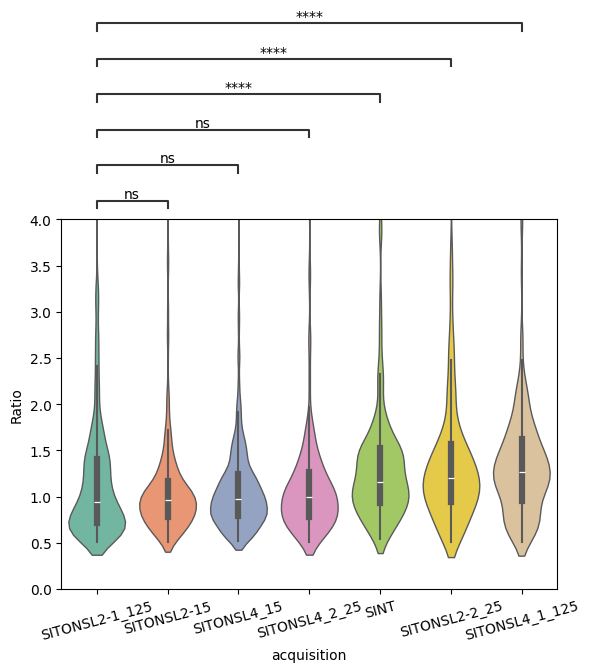

In [34]:
from statannotations.Annotator import Annotator

root_exp = Path("/home/clement/Documents/data/DNAFiber/Output_Clean/Ensemble/YM-2025-16/")
all_files = list(root_exp.glob("*.csv"))
all_dfs = []
for file in all_files:
    df = pd.read_csv(file)
    df['Ratio'] = 1/df['Ratio']
    df = df[(df['Ratio'] > 0.5) & (df['Ratio'] < 8)]

    df['acquisition'] = '-'.join(file.stem.split('-')[:-1])
    # Capitalize the acquisition name (if you want to capitalize the first letter)
    df['acquisition'] = df['acquisition'].str.upper()

    all_dfs.append(df)
df = pd.concat(all_dfs)


df['acquisition'] = pd.Categorical(df['acquisition'], categories=df.groupby('acquisition')['Ratio'].median().sort_values(ascending=True).index, ordered=True)


ax = sns.violinplot(data=df, y='Ratio', x='acquisition', palette='Set2', hue='acquisition', bw_adjust=.5, cut=1, linewidth=1)
ax.set_ylim(0, 4.0)
acquisitions = df['acquisition'].sort_values(ascending=True).unique()
acq1 = acquisitions[0]
pairs = [(acq1, acq2) for acq2 in acquisitions[1:]]
annotator = Annotator(ax, pairs, data=df, x='acquisition', y='Ratio', order=df['acquisition'].cat.categories.tolist())
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', text_offset=0.05, verbose=False, comparisons_correction='fdr_bh')
annotator.apply_and_annotate()

plt.xticks(rotation=15, ha='center')
plt.show()
